In [1]:
# Empiezo importando las librerias que usar en el projecto


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
# creo un DataFrame en pandas(pd) a partir de los datos contenidos en dataset_final.cvs

df = pd.read_csv("/Users/benjaminzelaya/Desktop/ML_Proyecto_1/ETL - EDA/Analisis Exploratorio Datos/movies_data_final.csv")

# Imprimo los primeros registros del DataFrame
df.head()

,id,original_language,overview,popularity,release_date,runtime,status,tagline,title,vote_average,...,name_genres,id_genres,name_companies,id_companies,Cod_countries,country_name,budget,revenue,release_year,return
0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,81.0,Released,NaN,Toy Story,7.7,...,Animation,16.0,Pixar Animation Studios,3.0,US,United States of America,30000000,373554033.0,1995,12.451801
1,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,...,Comedy,35.0,TriStar Pictures,559.0,US,United States of America,65000000,262797249.0,1995,4.043035
2,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,...,Family,10751.0,Teitler Film,2550.0,US,United States of America,0,0.0,1995,0.000000
3,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,...,Adventure,12.0,Interscope Communications,10201.0,US,United States of America,16000000,81452156.0,1995,5.090760
4,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,...,Fantasy,14.0,Warner Bros.,6194.0,US,United States of America,0,76578911.0,1995,0.000000


In [3]:
df.columns

Index(['id', 'original_language', 'overview', 'popularity', 'release_date',
       'runtime', 'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'id_bellongs_to_collection', 'name_bellongs_to_collection',
       'poster_bellongs_to_collection', 'backdrop_bellongs_to_collection',
       'Cod_languages', 'name_languages', 'name_genres', 'id_genres',
       'name_companies', 'id_companies', 'Cod_countries', 'country_name',
       'budget', 'revenue', 'release_year', 'return'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55619 entries, 0 to 55618
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               55619 non-null  int64  
 1   original_language                55604 non-null  object 
 2   overview                         54567 non-null  object 
 3   popularity                       55619 non-null  float64
 4   release_date                     55619 non-null  object 
 5   runtime                          55351 non-null  float64
 6   status                           55536 non-null  object 
 7   tagline                          25319 non-null  object 
 8   title                            55619 non-null  object 
 9   vote_average                     55619 non-null  float64
 10  vote_count                       55619 non-null  float64
 11  id_bellongs_to_collection        3969 non-null   float64
 12  name_bellongs_to_c

In [6]:
df.columns

Index(['id', 'original_language', 'overview', 'popularity', 'release_date',
       'runtime', 'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'id_bellongs_to_collection', 'name_bellongs_to_collection',
       'poster_bellongs_to_collection', 'backdrop_bellongs_to_collection',
       'Cod_languages', 'name_languages', 'name_genres', 'id_genres',
       'name_companies', 'id_companies', 'Cod_countries', 'country_name',
       'budget', 'revenue', 'release_year', 'return'],
      dtype='object')

In [7]:
df.isnull().mean()


id                                 0.000000
original_language                  0.000270
overview                           0.018914
popularity                         0.000000
release_date                       0.000000
runtime                            0.004818
status                             0.001492
tagline                            0.544778
title                              0.000000
vote_average                       0.000000
vote_count                         0.000000
id_bellongs_to_collection          0.928639
name_bellongs_to_collection        0.928639
poster_bellongs_to_collection      0.928639
backdrop_bellongs_to_collection    0.928639
Cod_languages                      0.032129
name_languages                     0.043798
name_genres                        0.010194
id_genres                          0.010194
name_companies                     0.093511
id_companies                       0.093511
Cod_countries                      0.111724
country_name                    

In [8]:
# quiero analizar las medidas para cada columna numérica que contenga el dataset.
df.describe()

# count: Número de valores no nulos presentes en la columna.
# mean: El promedio aritmético de los valores en la columna.
# Desviación estándar (std): La medida de la dispersión o variabilidad de los valores en la columna.
# Valor mínimo (min): El valor mínimo presente en la columna.
#Percentil 25 (25%): El valor por debajo del cual cae el 25% de los datos ordenados en la columna (primer cuartil).
#Percentil 50 (50%): También conocido como la mediana, es el valor que divide a los datos ordenados en la columna en dos partes iguales.
#Percentil 75 (75%): El valor por debajo del cual cae el 75% de los datos ordenados en la columna (tercer cuartil).
# Valor máximo (max): El valor máximo presente en la columna.

,id,popularity,runtime,vote_average,vote_count,id_bellongs_to_collection,id_genres,id_companies,budget,revenue,release_year,return
count,55619.000000,55619.000000,55351.000000,55619.000000,55619.000000,3969.000000,55052.000000,50418.000000,5.561900e+04,5.561900e+04,55619.000000,5.561900e+04
mean,105543.091480,3.208076,96.180105,5.685109,127.459969,151484.725876,2155.251344,12550.439050,5.059902e+06,1.273479e+07,1993.268829,5.386004e+02
std,111986.240568,6.357688,37.657904,1.861475,536.592385,134880.933989,4197.256946,19061.423762,1.910729e+07,6.866782e+07,22.912030,6.746606e+04
min,2.000000,0.000000,0.000000,0.000000,0.000000,10.000000,12.000000,1.000000,0.000000e+00,0.000000e+00,1874.000000,0.000000e+00
25%,24414.000000,0.436684,86.000000,5.100000,4.000000,37261.000000,18.000000,915.000000,0.000000e+00,0.000000e+00,1981.000000,0.000000e+00
50%,56800.000000,1.256144,96.000000,6.000000,11.000000,110021.000000,35.000000,6033.000000,0.000000e+00,0.000000e+00,2002.000000,0.000000e+00
75%,150229.500000,4.339898,108.000000,6.800000,41.000000,245326.000000,99.000000,13167.750000,0.000000e+00,0.000000e+00,2011.000000,0.000000e+00
max,469172.000000,547.488298,1256.000000,10.000000,14075.000000,479888.000000,29812.000000,96053.000000,3.800000e+08,2.787965e+09,2020.000000,1.239638e+07


## Distribucion de valores

# ANALISIS DE INGRESOS Y PRESUPUESTOS DE PELICULAS DEL DATASET

In [9]:
# Ordena el DataFrame por la columna 'revenue' en orden descendente
orden_revenue = df.sort_values(by='revenue', ascending=False)
orden_revenue

,id,original_language,overview,popularity,release_date,runtime,status,tagline,title,vote_average,...,name_genres,id_genres,name_companies,id_companies,Cod_countries,country_name,budget,revenue,release_year,return
18779,19995,en,"In the 22nd century, a paraplegic Marine is di...",185.070892,2009-12-10,162.0,Released,Enter the World of Pandora.,Avatar,7.2,...,Thriller,53.0,Cannon Group,1444.0,GB,United Kingdom,237000000,2.787965e+09,2009,11.763566
18778,19995,en,"In the 22nd century, a paraplegic Marine is di...",185.070892,2009-12-10,162.0,Released,Enter the World of Pandora.,Avatar,7.2,...,Thriller,53.0,Cannon Group,1444.0,US,United States of America,237000000,2.787965e+09,2009,11.763566
33493,140607,en,Thirty years after defeating the Galactic Empi...,31.626013,2015-12-15,136.0,Released,Every generation has a story.,Star Wars: The Force Awakens,7.5,...,Drama,18.0,M6,11261.0,US,United States of America,245000000,2.068224e+09,2015,8.441729
2095,597,en,"84 years later, a 101-year-old woman named Ros...",26.889070,1997-11-18,194.0,Released,Nothing on Earth could come between them.,Titanic,7.5,...,Horror,27.0,European Co-production Fund,30226.0,US,United States of America,200000000,1.845034e+09,1997,9.225171
22844,24428,en,When an unexpected enemy emerges and threatens...,89.887648,2012-04-25,143.0,Released,Some assembly required.,The Avengers,7.4,...,Comedy,35.0,Full Moon Entertainment,4867.0,US,United States of America,220000000,1.519558e+09,2012,6.907081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22563,29399,en,"Malcolm Shanks is a sad and lonely man, deaf, ...",1.096082,1974-10-09,93.0,Released,A new concept in the macabre in which the Good...,Shanks,5.7,...,Drama,18.0,Zenith Entertainment,3644.0,US,United States of America,0,0.000000e+00,1974,0.000000
22564,35257,en,The film begins with a live-action sequence se...,5.549395,2001-12-07,77.0,Released,NaN,Christmas Carol: The Movie,4.8,...,Comedy,35.0,Central,3649.0,GB,United Kingdom,0,0.000000e+00,2001,0.000000
22565,28793,en,A woman unable to conceive a child with her hu...,0.940153,2009-09-04,92.0,Released,NaN,Coffin Rock,6.0,...,Romance,10749.0,Recorded Picture Company (RPC),11561.0,AU,Australia,0,0.000000e+00,2009,0.000000
22566,28793,en,A woman unable to conceive a child with her hu...,0.940153,2009-09-04,92.0,Released,NaN,Coffin Rock,6.0,...,Romance,10749.0,Recorded Picture Company (RPC),11561.0,GB,United Kingdom,0,0.000000e+00,2009,0.000000


In [10]:
# Ordena el DataFrame por la columna 'budget' en orden descendente
orden_budget = df.sort_values(by='budget', ascending=False)
orden_budget

,id,original_language,overview,popularity,release_date,runtime,status,tagline,title,vote_average,...,name_genres,id_genres,name_companies,id_companies,Cod_countries,country_name,budget,revenue,release_year,return
22008,1865,en,Captain Jack Sparrow crosses paths with a woma...,27.887720,2011-05-14,136.0,Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,...,Fantasy,14.0,Paramount Pictures,4.0,US,United States of America,380000000,1.045714e+09,2011,2.751878
15261,285,en,"Captain Barbossa, long believed to be dead, ha...",31.363664,2007-05-19,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,...,Romance,10749.0,Paramount Pictures,4.0,US,United States of America,300000000,9.610000e+08,2007,3.203333
33499,99861,en,When Tony Stark tries to jumpstart a dormant p...,37.379420,2015-04-22,141.0,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,...,Romance,10749.0,Crescendo Productions,3314.0,US,United States of America,280000000,1.405404e+09,2015,5.019299
14243,1452,en,Superman returns to discover his 5-year absenc...,13.284712,2006-06-28,154.0,Released,NaN,Superman Returns,5.4,...,Comedy,35.0,ApolloMedia Distribution,16850.0,US,United States of America,270000000,3.910812e+08,2006,1.448449
20761,38757,en,When the kingdom's most wanted-and most charmi...,14.684761,2010-11-24,100.0,Released,They're taking adventure to new lengths.,Tangled,7.4,...,Western,37.0,Miramax Films,14.0,US,United States of America,260000000,5.917949e+08,2010,2.276134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22874,91961,en,A tough District Attorney (Walter Huston) goes...,0.856225,1931-08-22,68.0,Released,The Greatest Picture of the Year!,The Star Witness,5.5,...,Foreign,10769.0,Seven Arts,8268.0,US,United States of America,0,0.000000e+00,1931,0.000000
22875,95949,en,Drummer Stanley Maxton moves to Los Angeles wi...,0.088755,1951-08-01,85.0,Released,M-G-M's musical melodrama of the Dancer and th...,The Strip,5.3,...,Comedy,35.0,Carolco Pictures,14723.0,US,United States of America,0,0.000000e+00,1951,0.000000
22876,84299,en,"A man and woman, skeptical about romance, none...",0.735185,1931-08-13,90.0,Released,VINA DELMAR'S novel of New York Life - BAD GIRL,Bad Girl,4.7,...,Horror,27.0,Isolar,36122.0,US,United States of America,0,0.000000e+00,1931,0.000000
22880,38743,en,"The Dukes,a Doo Wop group, were on top of the ...",0.334768,2007-04-23,96.0,Released,"The music was then , the time is now",The Dukes,5.0,...,Adventure,12.0,Universal Pictures,33.0,US,United States of America,0,0.000000e+00,2007,0.000000


/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_31290/3342606486.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_movies_by_revenue['title'], rotation=45, ha='right')


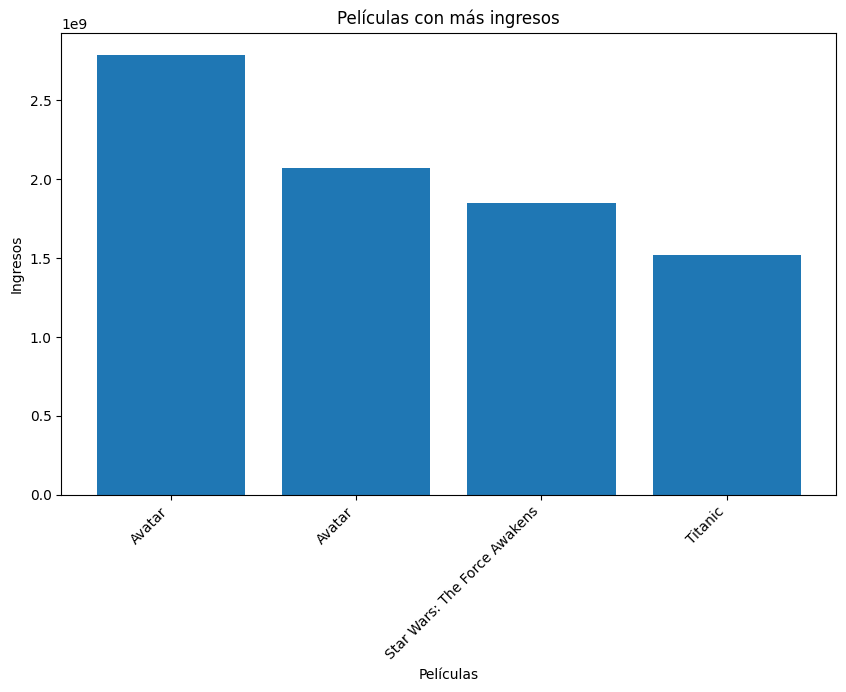

/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_31290/3342606486.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_movies_by_budget['title'], rotation=45, ha='right')


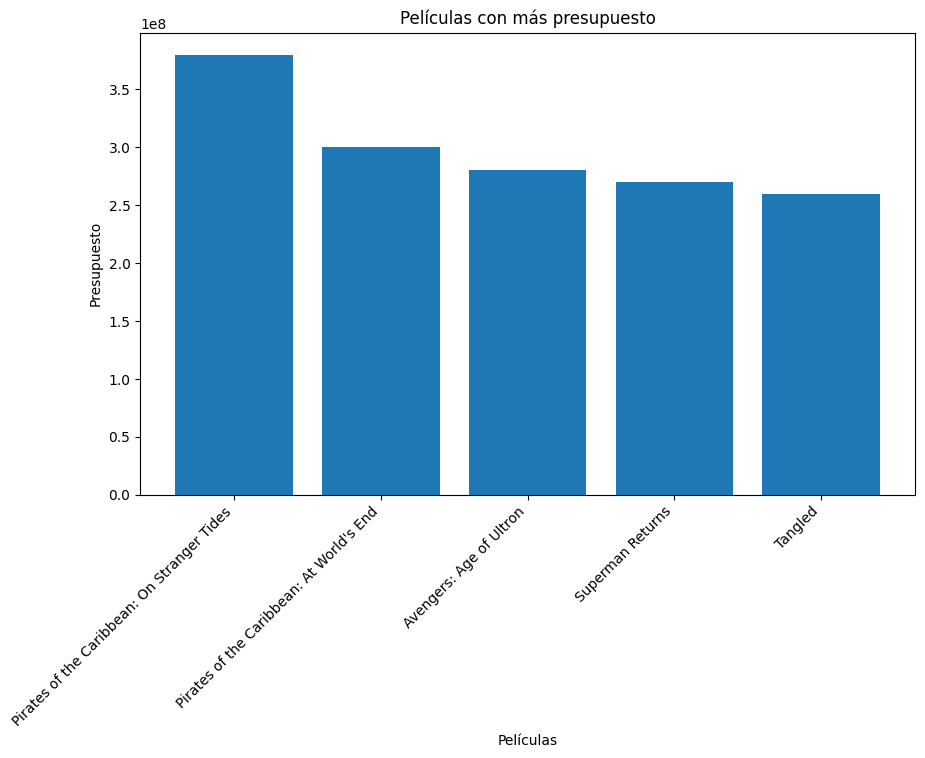

In [9]:


# Ordenar el DataFrame por ingresos (revenue) y presupuesto (budget) en orden descendente
df_sorted_by_revenue = df.sort_values(by='revenue', ascending=False)
df_sorted_by_budget = df.sort_values(by='budget', ascending=False)

# Seleccionar las películas con más ingresos y presupuestos
top_movies_by_revenue = df_sorted_by_revenue.head(5)  
top_movies_by_budget = df_sorted_by_budget.head(5)   

# Crear el gráfico de barras para ingresos
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_movies_by_revenue['title'], top_movies_by_revenue['revenue'])
ax.set_xlabel('Películas')
ax.set_ylabel('Ingresos')
ax.set_title('Películas con más ingresos')
ax.set_xticklabels(top_movies_by_revenue['title'], rotation=45, ha='right')

plt.show()

# Crear el gráfico de barras para presupuestos
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_movies_by_budget['title'], top_movies_by_budget['budget'])
ax.set_xlabel('Películas')
ax.set_ylabel('Presupuesto')
ax.set_title('Películas con más presupuesto')
ax.set_xticklabels(top_movies_by_budget['title'], rotation=45, ha='right')

plt.show()


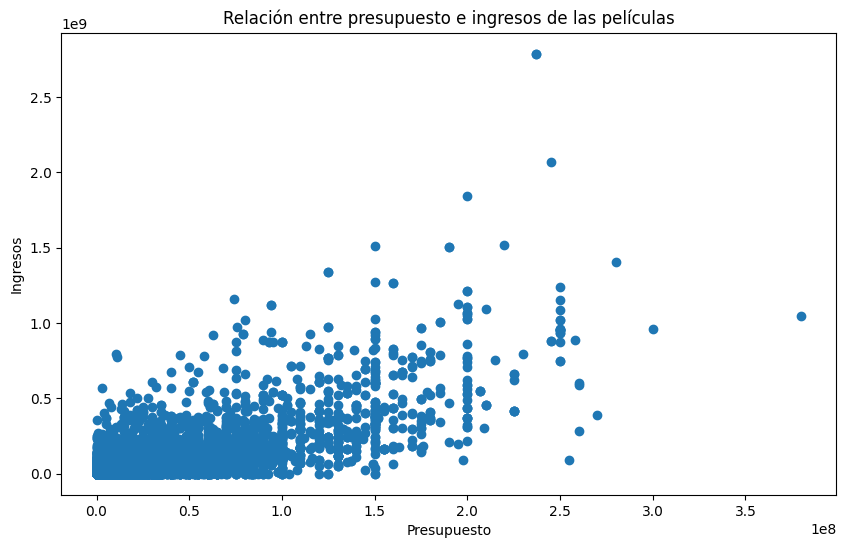

In [11]:
# Crea un gráfico de dispersión para visualizar los ingresos y presupuestos de las películas
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['budget'], df['revenue'])
ax.set_xlabel('Presupuesto')
ax.set_ylabel('Ingresos')
ax.set_title('Relación entre presupuesto e ingresos de las películas')

plt.show()

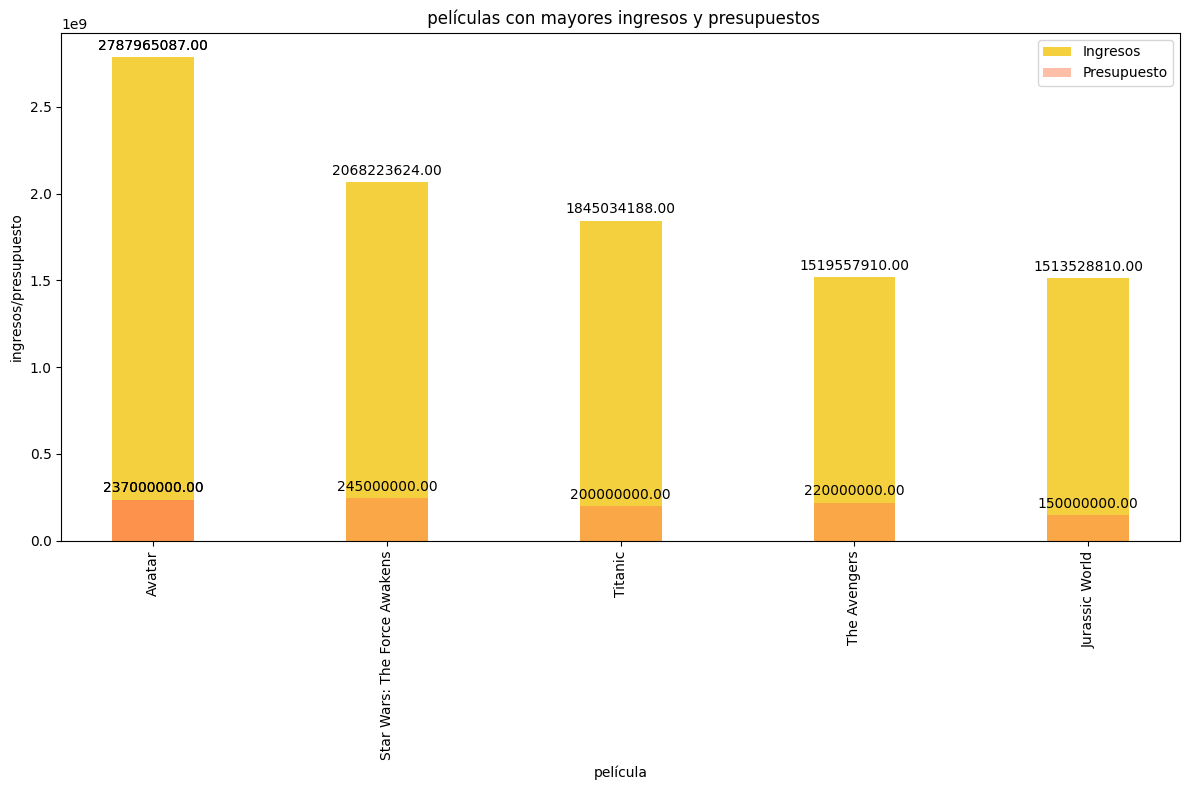

In [12]:
df_sorted = df.sort_values(by='revenue', ascending=False)
# películas con mayores ingresos
top_n = 6
top_movies = df_sorted.head(top_n)

# Prepara los datos para el gráfico
index = top_movies['title']
revenue = top_movies['revenue']
budget = top_movies['budget']


# Define los colores en tonos pasteles
colors = ['#F4D03F', '#FF7F50']

# Crea el gráfico de barras agrupadas con colores pasteles
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
opacity = 0.8
bar1 = ax.bar(index, revenue, bar_width, label='Ingresos', color=colors[0])
bar2 = ax.bar(index, budget, bar_width, label='Presupuesto', alpha=0.5, color=colors[1])

# Configura el estilo del gráfico
ax.set_xlabel('película')
ax.set_ylabel('ingresos/presupuesto')
ax.set_title(f' películas con mayores ingresos y presupuestos')
ax.legend()

# Añade etiquetas a las barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Peliculas por Paises y por Lenguajes

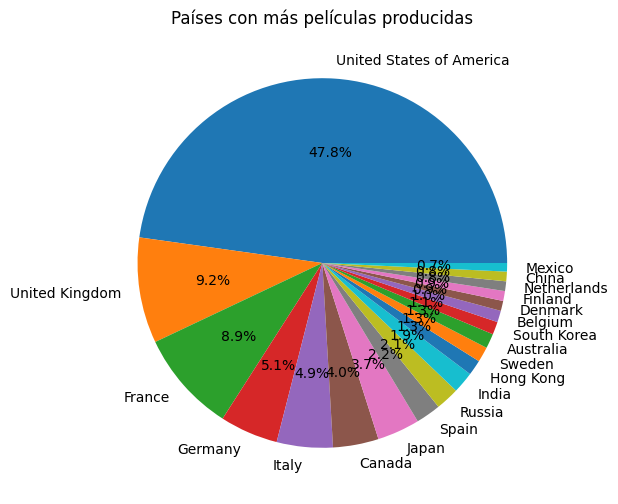

In [13]:
# Obtener el recuento de películas por país
country_counts = df['country_name'].value_counts()

# Limitar el número de países para mostrar en la gráfica
num_countries = 20  # Puedes ajustar este valor según tus necesidades
top_countries = country_counts.head(num_countries)

# Crear la gráfica de torta
plt.figure(figsize=(8, 6))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%')
plt.title('Países con más películas producidas')

# Mostrar la gráfica
plt.show()

# CLARAMENTE SE VE LA MAYOR PRODUCCION ESTA EN ESTADOS UNIDOS,SEGUIDO DE INGLATERRA Y FRANCIA.

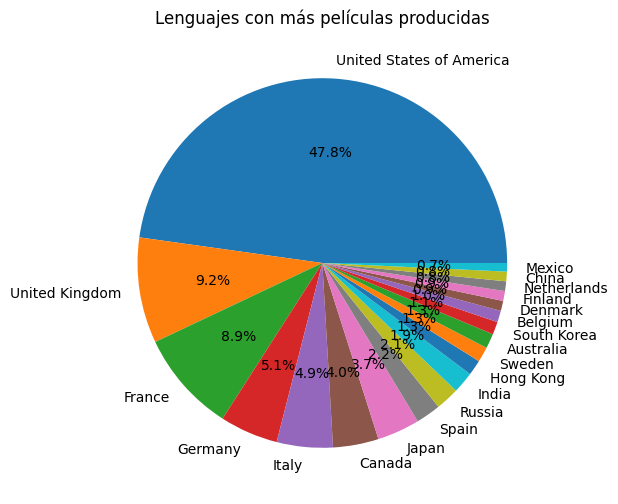

In [14]:
# Obtener el recuento de películas por lenaguaje
language_counts = df['original_language'].value_counts()

# Limitar el número de países para mostrar en la gráfica
num_language = 20  # Puedes ajustar este valor según tus necesidades
top_language = country_counts.head(num_language)

# Crear la gráfica de torta
plt.figure(figsize=(8, 6))
plt.pie(top_language, labels=top_language.index, autopct='%1.1f%%')
plt.title('Lenguajes con más películas producidas')

# Mostrar la gráfica
plt.show()

# Prodemos observar que el lenguaje que tiene mas peliculas es el ingles con un 71,4%, seguidos del frances con un 6,4% y despues italiano 3,9%.

# Año con mayor cantidad de peliculas realizadas

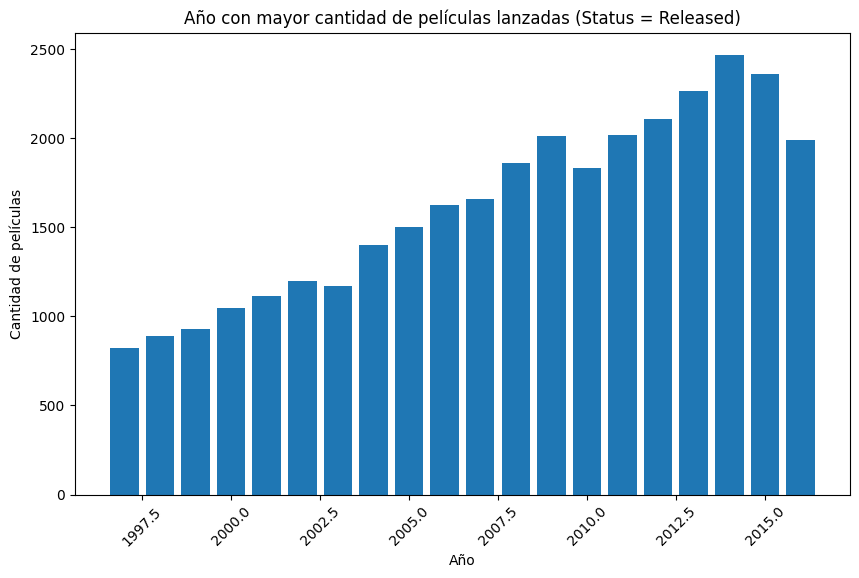

In [15]:
df_released = df[df['status'] == 'Released']

# Obtener el recuento de películas por año para las películas 'Released'
year_counts = df_released['release_year'].value_counts()

# Limitar el número de años para mostrar en la gráfica
num_year = 20  # Puedes ajustar este valor según tus necesidades
top_year = year_counts.head(num_year)

# Convertir los años a enteros utilizando astype(int)
top_year.index = top_year.index.astype(int)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(top_year.index, top_year.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Año con mayor cantidad de películas lanzadas (Status = Released)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar la gráfica
plt.show()

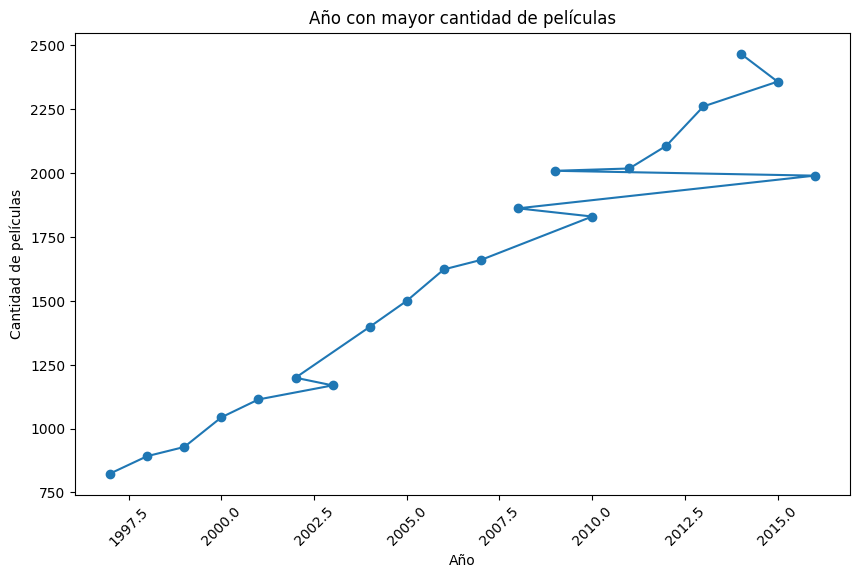

In [16]:
# Filtrar el DataFrame para las filas donde 'Status' sea igual a 'Released'
df_released = df[df['status'] == 'Released']

# Obtener el recuento de películas por año para las películas 'Released'
year_counts = df_released['release_year'].value_counts()

# Limitar el número de años para mostrar en la gráfica
num_year = 20  # Puedes ajustar este valor según tus necesidades
top_year = year_counts.head(num_year)

# Convertir los años a enteros utilizando astype(int)
top_year.index = top_year.index.astype(int)
# Crear la gráfica de líneas
plt.figure(figsize=(10, 6))
plt.plot(top_year.index, top_year.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Año con mayor cantidad de películas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar la gráfica
plt.show()

# Correlacion entre variables del dataset



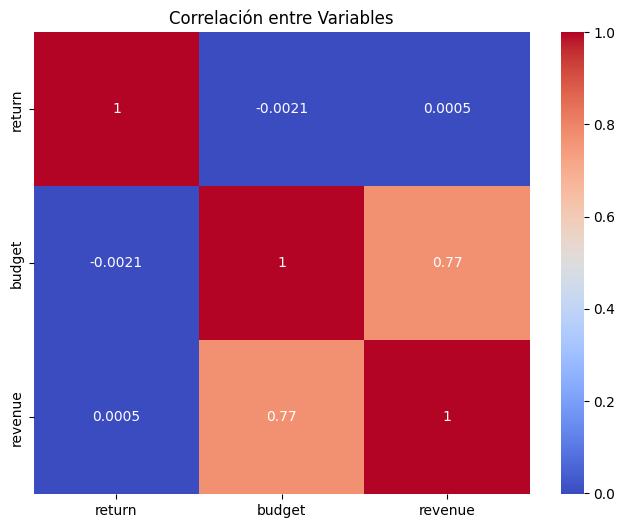

In [21]:


selected_vars = ['return', 'budget', 'revenue']
selected_df = df[selected_vars]

correlation_matrix = selected_df.corr()

# Genero el mapa de calor con Matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables')
plt.show()

